# Visualizing data with Seaborn

This notebook shows examples of how to use the powerful Seaborn package for visualizing data and understanding data through graphics.

We first read in some glucose monitoring data:

In [15]:
import seaborn as sns
import numpy as np
from bokeh.sampledata.glucose import data as glucose

In [16]:
glucose.isig.values

array(['22.59', '22.52', '22.23', ..., '29.06', '29.3', '30.8'], dtype=object)

In [17]:
isig = np.array(glucose['isig'].replace(to_replace='nil', value=np.nan), dtype=np.float64)
glucose['isig'] = isig

In [20]:
glucose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52281 entries, 2010-03-24 09:51:00 to 2010-10-10 23:57:00
Data columns (total 2 columns):
isig       51220 non-null float64
glucose    52281 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.2 MB


In [19]:
glucose.head(5)

,isig,glucose
datetime,,
2010-03-24 09:51:00,22.59,258
2010-03-24 09:56:00,22.52,260
2010-03-24 10:01:00,22.23,258
2010-03-24 10:06:00,21.56,254
2010-03-24 10:11:00,20.79,246


In [18]:
glucose.shape

(52281, 2)

In [5]:
glucose.dtypes

isig       float64
glucose      int64
dtype: object

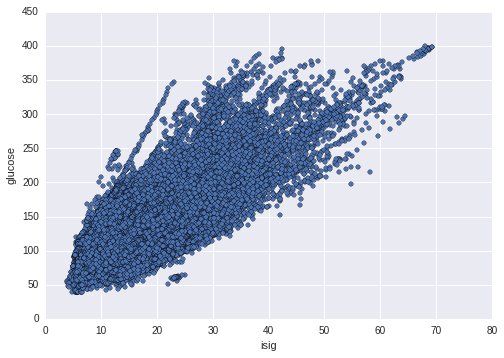

In [6]:
glucose.plot(kind='scatter', x='isig', y='glucose');

In [7]:
sns.jointplot?

In [8]:
import matplotlib as mpl
mpl.rc("figure", figsize=(12, 12))

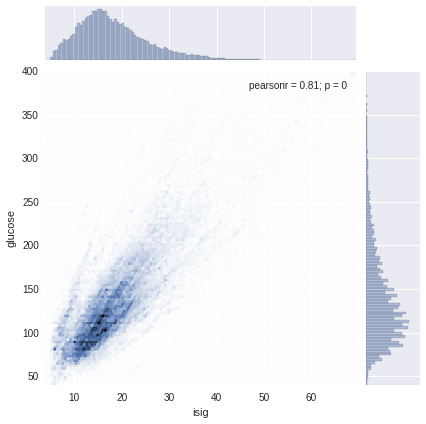

In [21]:
sns.jointplot('isig', 'glucose', glucose, kind='hex');

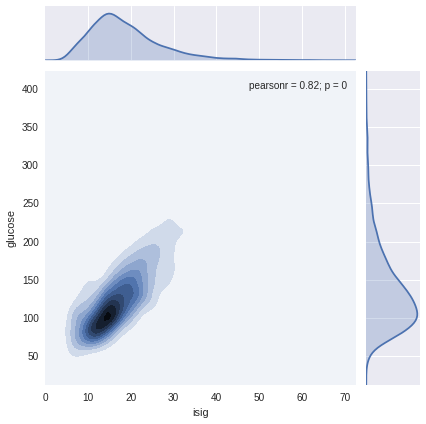

In [23]:
sns.jointplot('isig', 'glucose', glucose[::10], kind='kde');

In [11]:
sns.regplot?

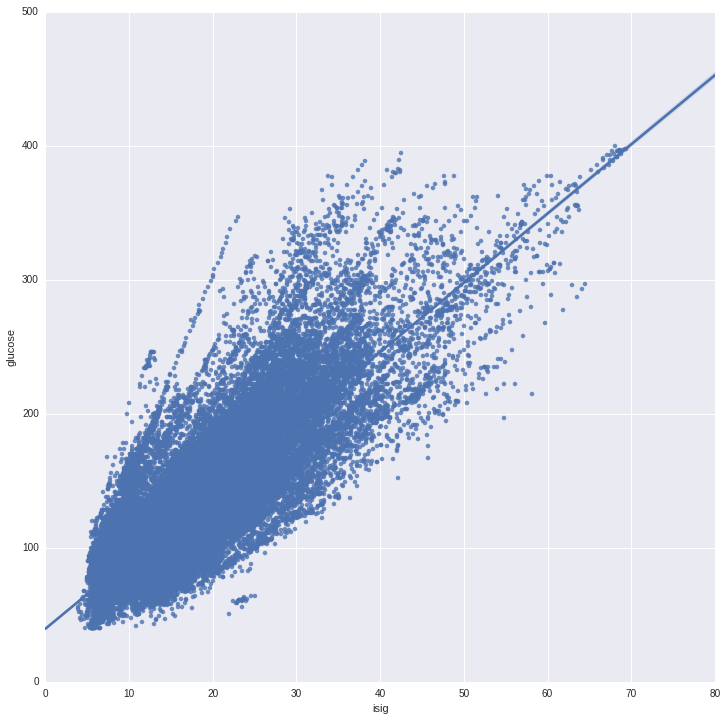

In [22]:
sns.regplot('isig', 'glucose', glucose);

## Time-series plots

In [24]:
import pandas as pd
ts = pd.read_csv('data/linear_bucket/test_data.csv',
                 index_col='Date')
ts.head()

,P (mm),PET (mm),Qobs (mm)
Date,,,
1991-01-01,14.1,0.46,2.808
1991-01-02,3.7,0.46,4.951
1991-01-03,7.1,0.47,4.519
1991-01-04,9.3,0.47,4.386
1991-01-05,7.1,0.48,5.350


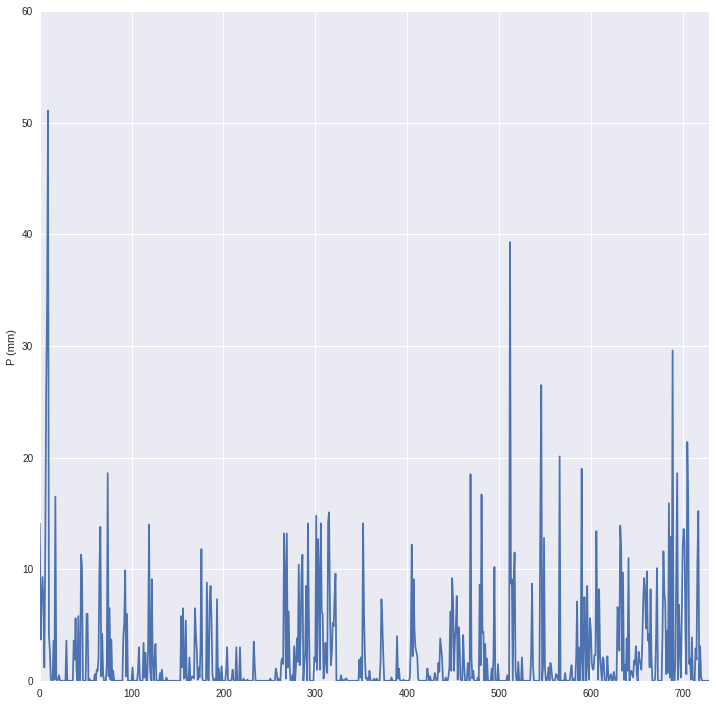

In [32]:
sns.tsplot(ts['P (mm)'], value='P (mm)');

## Faceted plots

In [2]:
import pandas as pd
tips = pd.read_csv('/data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
import matplotlib as mpl
mpl.rc("figure", figsize=(5, 5))

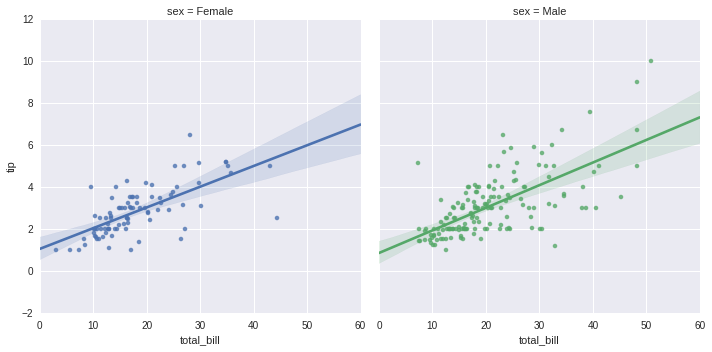

In [7]:
import seaborn as sns
sns.lmplot('total_bill', 'tip', tips, col='sex', hue='sex')

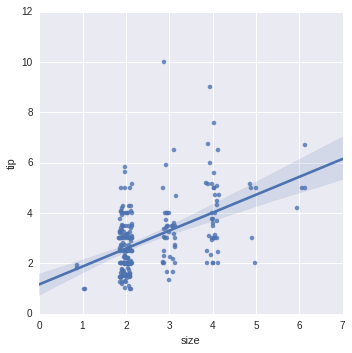

In [44]:
sns.lmplot('size', 'tip', tips, x_jitter=.15);

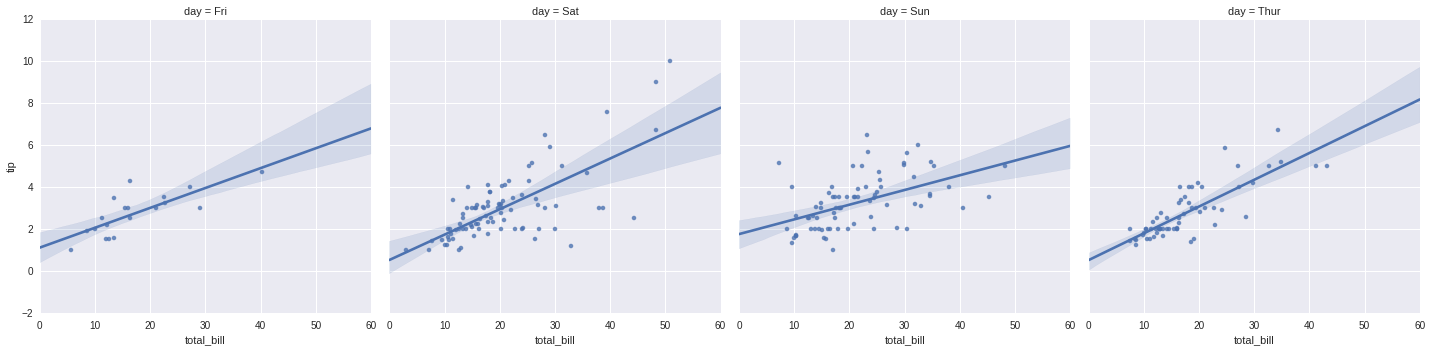

In [51]:
sns.lmplot("total_bill", "tip", tips, col="day", palette="bright")

## Interactions between continuous variables

In [8]:
import pandas as pd
ts = pd.read_csv('/data/CSIRO_2014/linear_bucket/test_data.csv',
                 index_col='Date')

In [9]:
ts.head(5)

,P (mm),PET (mm),Qobs (mm)
Date,,,
1991-01-01,14.1,0.46,2.808
1991-01-02,3.7,0.46,4.951
1991-01-03,7.1,0.47,4.519
1991-01-04,9.3,0.47,4.386
1991-01-05,7.1,0.48,5.350


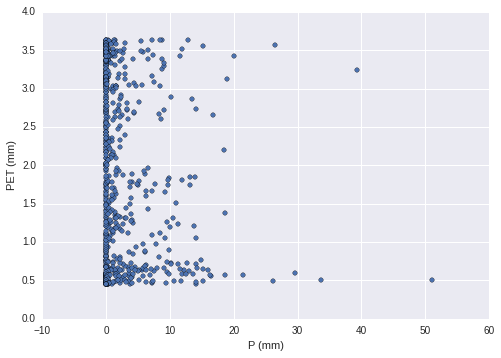

In [14]:
ts.plot(x='P (mm)', y='PET (mm)', kind='scatter');

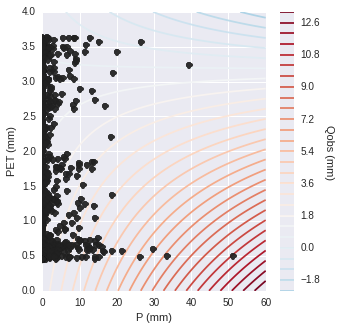

In [55]:
sns.interactplot('P (mm)', 'PET (mm)', 'Qobs (mm)', ts);